# Кривошеев Александр 853501. ММОД. Лабораторная работа 3. Вариант 13

In [ ]:
import numpy as np
from math import log, factorial, exp
import matplotlib.pyplot as plt


class QueueSystem:

    def __init__(self):
        self.lambda_ = 0.1
        self.time = 0
        self.forward_count = 0
        self.backward_count = 0
        self.state = 0
        self.in_time = []
        self.out_time = []
        self.states = []
        self.state_times = []

    def mu(self, tau):
        #return self.lambda_ + 0.1
        return  27 * ((tau / 60) ** 2) / (2 ** 10) * exp(-(tau / 60) * 3 / 8)

    def get_time_interval(self, intensity):
        if intensity != 0:
            return -1 / intensity * log(np.random.uniform(0, 1))
        return np.inf


    def iterate(self):
        self.states.append(self.state)
        self.state_times.append(self.time)
        
        t_back = self.get_time_interval(self.mu(self.time))
        t_for = self.get_time_interval(self.lambda_)
        if t_back <= t_for and self.state > 0:
            self.backward_count += 1
            self.time += t_back  
            self.out_time.append(self.time)
            self.state -= 1
        else:
            self.forward_count += 1
            self.time += t_for
            self.in_time.append(self.time)
            self.state += 1
        
       

    def ro(self):
        lambda_sum = 0
        mu_sum = 0
        for t in self.state_times:
            lambda_sum += self.lambda_
            mu_sum += self.mu(t)
        return lambda_sum / mu_sum

    def emp_avg_orders_in_system(self):
        return np.mean(self.states)

    def emp_avg_orders_in_queue(self):
        current_queue = [max(0, state - 1) for state in self.states]
        return np.mean(current_queue)

    def emp_avg_time_in_system(self):
        return np.mean([self.out_time[i] - self.in_time[i] for i in range(len(self.out_time))])

    def emp_avg_time_in_queue(self):
        return self.emp_avg_orders_in_queue() / self.lambda_

    def theor_avg_orders_in_queue(self):
        ro_ = self.ro()
        if ro_ >= 1:
          return np.inf
        return ro_ ** 2 / (1 - ro_)
    
    def theor_avg_orders_in_system(self):
        ro_ = self.ro()
        if ro_ >= 1:
          return np.inf
        return ro_ / (1 - ro_)
    
    def theor_avg_time_in_queue(self):
        return self.theor_avg_orders_in_queue() / self.lambda_
    
    def theor_avg_time_in_system(self):
        return self.theor_avg_orders_in_system() / self.lambda_
    

    

    


500
500
Эмпирическое среднее число заказов в системе:  1.338
Теоритическое среднее число заказов в системе:  1.0
Эмпирическое среднее число заказов в очереди:  0.61
Теоритическое среднее число заказов в очереди:  0.5
Эмпирическое среднее время заказа в системе:  9.240941176670324
Теоритическое среднее время заказа в системе:  10.0
Эмпирическое среднее время заказа в очереди:  6.1
Теоритическое среднее время заказа в очереди:  5.0


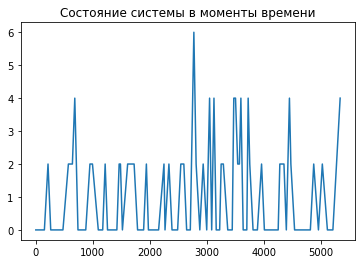

In [ ]:
qs = QueueSystem()
volume = 1000
for _ in range(volume):
    qs.iterate()

#print(qs.ro())
print(qs.forward_count)
print(qs.backward_count)
print("Эмпирическое среднее число заказов в системе: ", qs.emp_avg_orders_in_system())
print("Теоритическое среднее число заказов в системе: ", qs.theor_avg_orders_in_system())
print("Эмпирическое среднее число заказов в очереди: ", qs.emp_avg_orders_in_queue())
print("Теоритическое среднее число заказов в очереди: ", qs.theor_avg_orders_in_queue())
print("Эмпирическое среднее время заказа в системе: ", qs.emp_avg_time_in_system())
print("Теоритическое среднее время заказа в системе: ", qs.theor_avg_time_in_system())
print("Эмпирическое среднее время заказа в очереди: ", qs.emp_avg_time_in_queue())
print("Теоритическое среднее время заказа в очереди: ", qs.theor_avg_time_in_queue())

plt.plot(qs.state_times[::volume // 100], qs.states[::volume // 100])
plt.title('Состояние системы в моменты времени')
plt.show()
